# Fuel consumption linear regression
Using scipy
adding test/train
using Cross Fold validation


In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

In [63]:
!wget -O /resources/FuelConsumption.csv https://ibm.box.com/shared/static/ez95yurarnp0q31l9jl1ma51mh6qtxj2.csv

--2015-10-05 18:10:45--  https://ibm.box.com/shared/static/ez95yurarnp0q31l9jl1ma51mh6qtxj2.csv
Resolving ibm.box.com... 74.112.185.182, 74.112.184.85
Connecting to ibm.box.com|74.112.185.182|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ibm.app.box.com/shared/static/ez95yurarnp0q31l9jl1ma51mh6qtxj2.csv [following]
--2015-10-05 18:10:45--  https://ibm.app.box.com/shared/static/ez95yurarnp0q31l9jl1ma51mh6qtxj2.csv
Resolving ibm.app.box.com... 74.112.185.87, 74.112.184.87
Connecting to ibm.app.box.com|74.112.185.87|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.boxcloud.com/d/1/sRUDTUN2j2xKlBIlv08Zje2PwfKyqsmzmXFCdVqtjy8c36Jcb-POfCNnNtUdn2L7vtZYKovTC8dAiKWMTnr2PmjBHneRIVISxUcu3ltt9xVrVy8w2YqTAwZ92RINVWmaRi8oFxuh2RuVeYHT_ifPia17jdeId-jd-Wvi3rdQiwIz1bVH2rhH2vA0T4v2rVr8nXGWISYyiofKwQefbla-m71bn6uY7wxfe_xRaRLzHobUJBxqmYBG7c1YREktgoELsZFjXvfKQSMuTIeJgeKvPX2FcaGl7B3cM0j-ATPqOCGuXx3hbvB3LnLV6oHJooyRzFLT1aQFEqOVE

In [64]:
df = pd.read_csv("/resources/FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [65]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


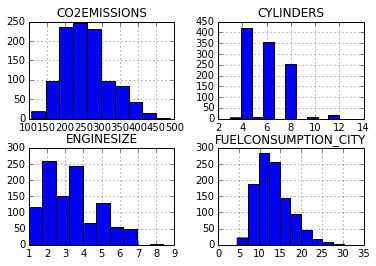

In [66]:
viz=df[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_CITY']]
viz.hist()
plt.show()

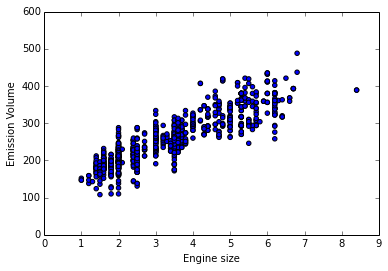

In [67]:
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS)
plt.xlabel("Engine size")
plt.ylabel("Emission Volume")
plt.show()

In [68]:
msk = np.random.rand(len(df)) < 0.8
trainDf=df[msk]
testDf=df[~msk]

polyfit --> Least squares polynomial fit  
Degree of the fitting polynomial=1

slope: 39.241417995
intercept: 124.754713175
residuals (sum of the squares of the fit errors): [ 814595.60926075]
singular values: [ 1.38514522  0.28525902]
conditioning threshold: 1.9251267247e-13
 
39.24 x + 124.8


/Library/Python/2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


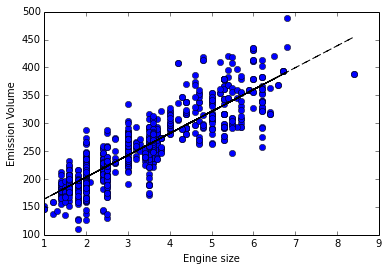

In [69]:
fit = np.polyfit(trainDf.ENGINESIZE, trainDf.CO2EMISSIONS, deg=1,full=True)
print 'slope:',fit[0][0]
print 'intercept:',fit[0][1]
print 'residuals (sum of the squares of the fit errors):',fit[1] 
print 'singular values:', fit [3]
print 'conditioning threshold:',fit[4]

fit_fn = np.poly1d(fit[0]) # param: The polynomial’s coefficients
trainDf['predicted']=fit_fn(trainDf.ENGINESIZE)
print fit_fn 
plt.plot(trainDf.ENGINESIZE, trainDf.CO2EMISSIONS, 'bo', trainDf.ENGINESIZE, trainDf.predicted, '--k')
plt.xlabel("Engine size")
plt.ylabel("Emission Volume")
plt.show()




### Traing dataset error
SST is the total sum of squares  
SSR is the regression sum of squares   
SSE is the sum of squared errors  
In some texts, the abbreviations SSR and SSE have the opposite meaning: SSR stands for the residual sum of squares (which then refers to the sum of squared errors in the upper example) and SSE stands for the explained sum of squares (another name for the regression sum of squares).

In [86]:
SST=np.sum((trainDf.CO2EMISSIONS-np.average(trainDf.CO2EMISSIONS))**2)
print SST
SSR=np.sum((trainDf.predicted-np.average(trainDf.CO2EMISSIONS))**2)
print SSR
R2=SSR/SST
print R2

3566656.609
2752060.99974
0.77160806364


### Test dataset evaluation

/Library/Python/2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


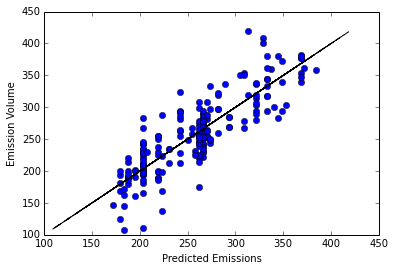

In [87]:
testDf['predicted']= fit_fn(testDf.ENGINESIZE)
plt.plot(testDf.predicted, testDf.CO2EMISSIONS, 'bo', testDf.CO2EMISSIONS, testDf.CO2EMISSIONS, '--k')
plt.xlabel("Predicted Emissions")
plt.ylabel("Emission Volume")
plt.show()

### Test data set error

In [98]:
SST=np.sum((testDf.CO2EMISSIONS-np.average(testDf.CO2EMISSIONS))**2)
SSR=np.sum((testDf.predicted-np.average(testDf.CO2EMISSIONS))**2)
R2=SSR/SST
print R2

0.754810756503


### Cross fold validation


In [97]:
from sklearn import cross_validation
cv = cross_validation.KFold(len(df), 10)
R2=[]
for train,test in cv:
    #print test
    tr=df.ix[train]
    fit = np.polyfit(tr.ENGINESIZE, tr.CO2EMISSIONS, deg=1,full=True) 
    #print 'residuals (sum of the squares of the fit errors):',fit[1] 
    ts=df.ix[test]
    fit_fn = np.poly1d(fit[0])
    ts['predicted']= fit_fn(ts.ENGINESIZE)
    SST=np.sum((ts.CO2EMISSIONS-np.average(ts.CO2EMISSIONS))**2)
    SSR=np.sum((ts.predicted-np.average(ts.CO2EMISSIONS))**2)
    R2.append(SSR/SST)
print np.average(R2)
    

0.788380049099
